# How to get the highest Borrower APR
## by Michael Wei

## Investigation Overview

Goal: To show how you, as a borrower, can land the highest Borrower APR.

## Dataset Overview

### Prosper Loan Data:

Primary Variables:
<ul>
    <li>Loan Status</li>
    <li>Borrower APR</li>
    <li>Prosper Score</li>
</ul>

### Secondary Variables:
<ul>
    <li>Credit Rating</li>
    <li>Listing Category</li>
    <li>Employment Status</li>
    <li>Credit Range</li>
    <li>Income Range</li>
    <li>Homeowner Status</li>
</ul>

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

prosper = pd.read_csv('prosperLoanData.csv')

prosper.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


### How are the Primary Variables distributed?

## Loan Status

Most loans are either Current, Completed, Defaulted, or Chargedoff.

In [3]:
base_color = sb.color_palette()[-1]

In [4]:
fig_length = 14
fig_height = 10

In [5]:
# We'll order these from best status to most distasteful status

type_counts = prosper['LoanStatus'].value_counts()

ls_order = ['Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)',
            'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
            'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff',
            'Cancelled']

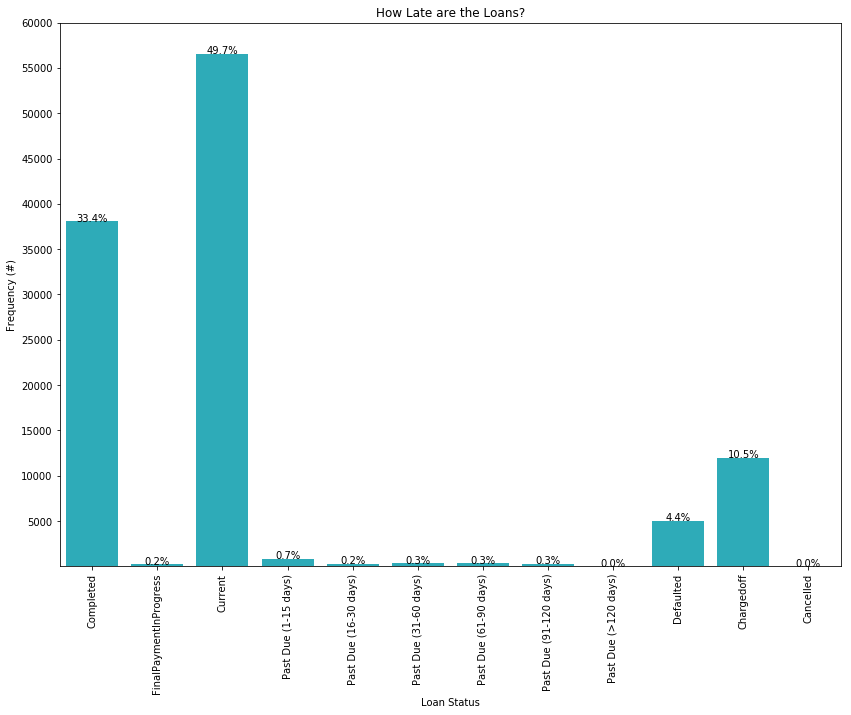

In [6]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_1 = sb.countplot(data = prosper, x = 'LoanStatus', color = base_color,
             order = ls_order)

for i in range(len(ls_order)):
    count = type_counts[ls_order[i]]
    #print(ls_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.title('How Late are the Loans?')
plt.xticks(rotation = 90)
plt.yticks(np.arange(5000, 65000, 5000))

plt.xlabel('Loan Status')
plt.ylabel('Frequency (#)');

## Borrower APR

* Mean is ~ 22%
* Distribution is somewhat normal, with a few extra peaks at 30 % and 35 %.

In [7]:
# Drop the rows with null Borrower APRs. In our EDA, we found that there are 25 data points, so
# we probably don't need to worry about affecting the Loan Status analysis

null_apr = prosper[prosper['BorrowerAPR'].isnull()].index

prosper.drop(null_apr, axis = 0, inplace = True)

In [8]:
apr_bins = np.arange(prosper['BorrowerAPR'].min(), prosper['BorrowerAPR'].max() + 0.005, 0.005)

In [9]:
mean_APR = prosper['BorrowerAPR'].mean()

low_APR = np.percentile(prosper['BorrowerAPR'], 2.5)
high_APR = np.percentile(prosper['BorrowerAPR'], 97.5)

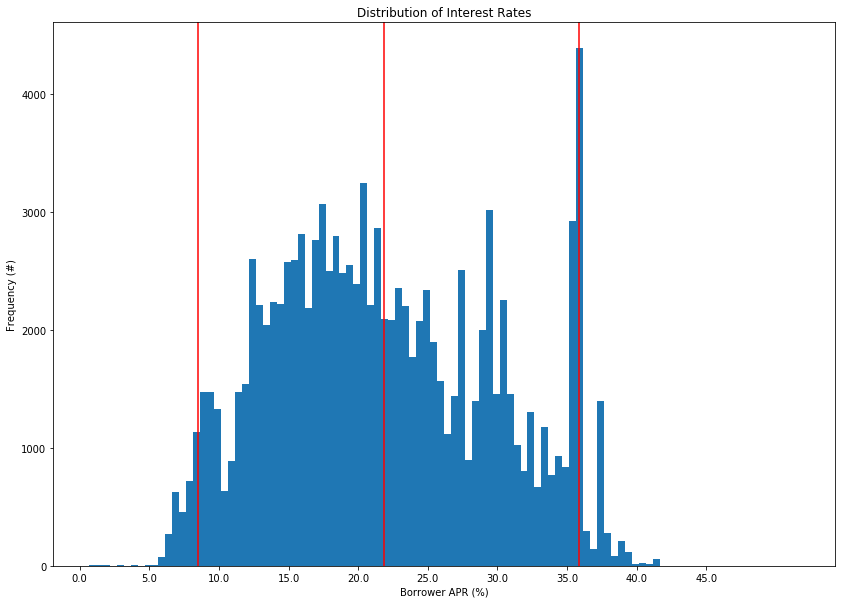

In [10]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_2 = plt.hist(data = prosper, x = 'BorrowerAPR', bins = apr_bins)

plt.axvline(x = mean_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = low_APR, color = 'r', linewidth = 1.5)
plt.axvline(x = high_APR, color = 'r', linewidth = 1.5)

x_range = np.arange(0, 0.45 + 0.05, 0.05)
x_label = ['{:.1f}'.format(v * 100) for v in x_range]

plt.xticks(x_range, x_label);
plt.xlabel('Borrower APR (%)')
plt.ylabel('Frequency (#)')
plt.title('Distribution of Interest Rates');

## Prosper Score

* Applicable for loans after 2009
* Possible Range: 1 - 11
* Most loans have a Prosper Score between 2 and 10. 

In [11]:
ps_order = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [12]:
type_counts = prosper['ProsperScore'].value_counts()
type_order = prosper['ProsperScore'].value_counts().index

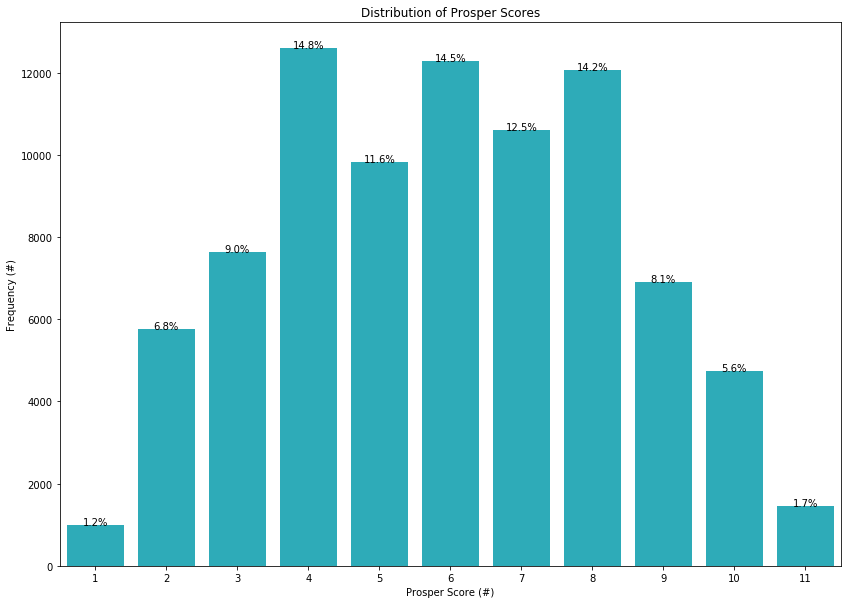

In [13]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_3 = sb.countplot(data = prosper, x = 'ProsperScore', color = base_color,
                    order = ps_order)

for i in type_order:
    count = type_counts[i]
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    #print(i, ': ', count, ': ', display_val)
    plt.text(i - 1, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xlabel('Prosper Score (#)')
plt.ylabel('Frequency (#)')
plt.title('Distribution of Prosper Scores');

## Credit Rating

* Possible Ratings: No Credit (NC), High Risk (HR), E, D, C, B, A, AA
* Most loans are between a D and A rating
* Lots of loans are HR, E, and AA.

In [14]:
cg_order = ['NC', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']

In [15]:
prosper['CreditRating'] = prosper['CreditGrade'].fillna('') + prosper['ProsperRating (Alpha)'].fillna('');

prosper['CreditRating'].replace(r'', np.nan, regex = True, inplace = True)

In [16]:
type_counts = prosper['CreditRating'].value_counts()

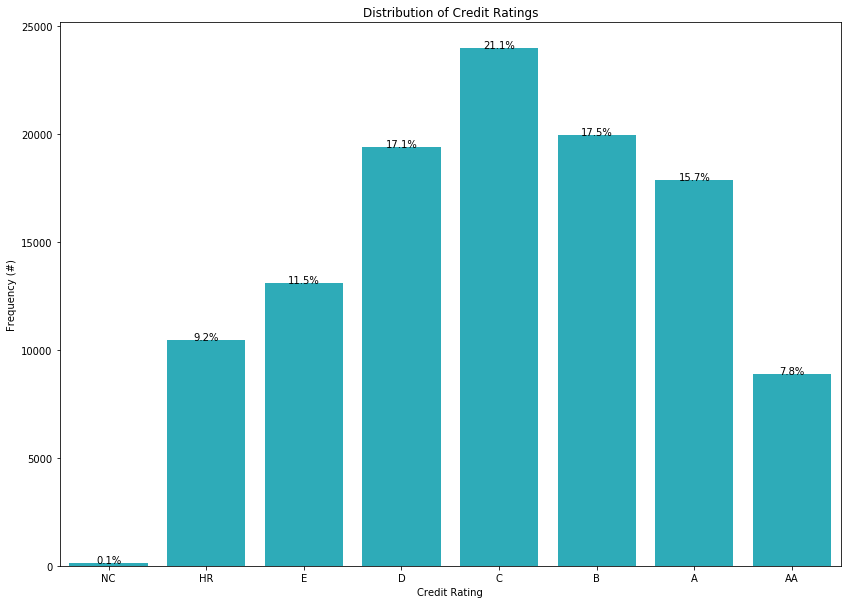

In [17]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_4 = sb.countplot(data = prosper, x = 'CreditRating', color = base_color,
             order = cg_order)

for i in range(len(cg_order)):
    count = type_counts[cg_order[i]]
    #print(cg_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xlabel('Credit Rating')
plt.ylabel('Frequency (#)')
plt.title('Distribution of Credit Ratings');

## Listing Category

* What is loan money going towards? Mostly Debt Consolidation (1)
* Lots of loans in either Not Available (0) or Other categories (7)

In [18]:
# Ordered from 0 to 20

lc_order = prosper['ListingCategory (numeric)'].value_counts().sort_index().index

lc_ticks = ['Not Available (0)', 'Debt Consolidation (1)', 'Home Improvement (2)', 'Business (3)',
            'Personal Loan (4)', 'Student Use (5)', 'Auto (6)', 'Other (7)', 'Baby & Adoption (8)',
            'Boat (9)', 'Cosmetic Procedure (10)', 'Engagement Ring (11)', 'Green Loans (12)',
            'Household Expenses (13)', 'Large Purchages (14)', 'Medical/Dental (15)',
            'Motorcycle (16)', 'RV (17)', 'Taxes (18)', 'Vacation (19)', 'Wedding Loans (20)']

In [19]:
type_counts = prosper['ListingCategory (numeric)'].value_counts()

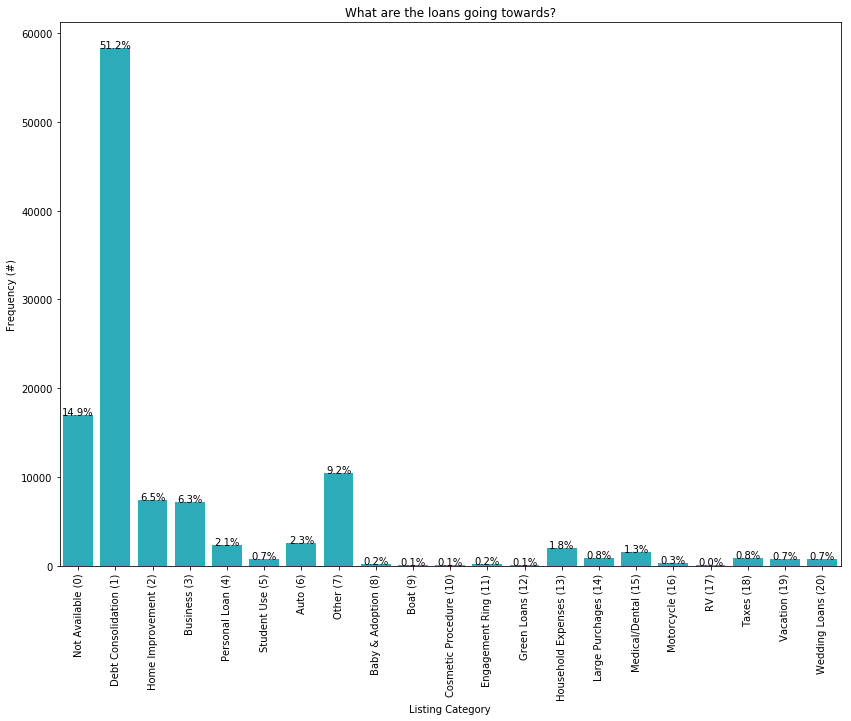

In [20]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_5 = sb.countplot(data = prosper, x = 'ListingCategory (numeric)', color = base_color,
                    order = lc_order)

for i in range(len(lc_order)):
    count = type_counts[lc_order[i]]
    #print(lc_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

ax_5.set_xticklabels(lc_ticks)
plt.xticks(rotation = 90)

plt.xlabel('Listing Category')
plt.ylabel('Frequency (#)')
plt.title('What are the loans going towards?');

## Employment Status

* Most borrowers are either Employed or Full-time
* Some borrowers are Self-employed or Not available/Other (These could be students)

In [21]:
# No inherent order of employment status, other than employed/full-time better than Not employed
# Ordered these based on frequency

es_order = prosper['EmploymentStatus'].value_counts().index

In [22]:
type_counts = prosper['EmploymentStatus'].value_counts()

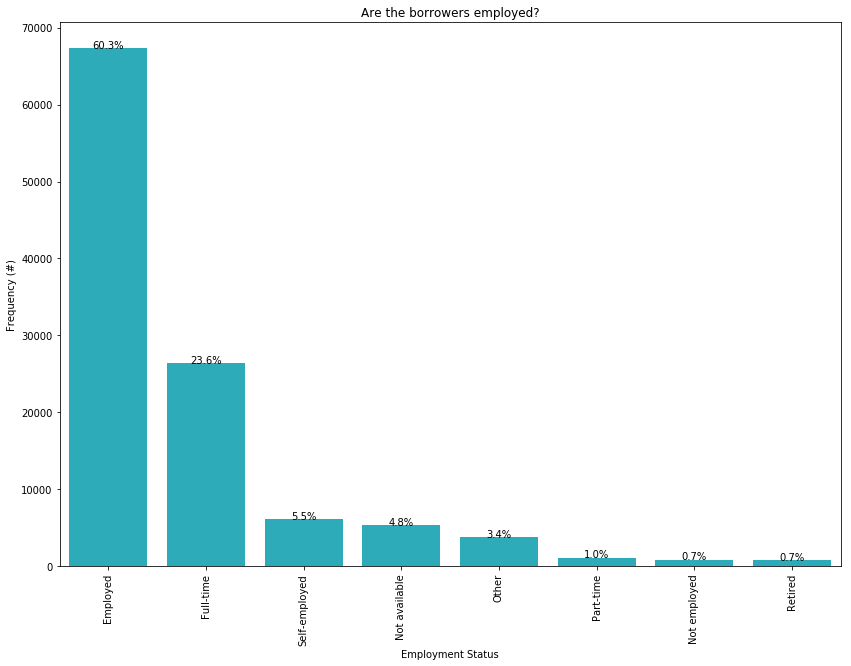

In [23]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_6 = sb.countplot(data = prosper, x = 'EmploymentStatus', color = base_color,
                    order = es_order)

for i in range(len(es_order)):
    count = type_counts[es_order[i]]
    #print(es_order[i], ': ', count)
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xticks(rotation = 90)
plt.xlabel('Employment Status')
plt.ylabel('Frequency (#)')
plt.title('Are the borrowers employed?');

## Credit Score Range

* How are Credit Ranges distributed? Most borrowers have a Credit Score between 640 and 800.
* Distribution looks pretty normal. Credit Ranges are basically pre-binned for us

In [24]:
prosper['CreditRange'] = prosper['CreditScoreRangeLower'].astype(str).str.extract(r'(\d{1,3})') + ' - ' + prosper['CreditScoreRangeUpper'].astype(str).str.extract(r'(\d{1,3})')

In [25]:
credit_order = list(prosper['CreditRange'].value_counts().sort_index().index)

#credit_order = credit_order[-1:] + credit_order[:-1]

In [26]:
cr_classes = pd.api.types.CategoricalDtype(ordered = True, categories = credit_order)

prosper['CreditRange'] = prosper['CreditRange'].astype(cr_classes)

In [27]:
type_counts = prosper['CreditRange'].value_counts()
#type_order = prosper['CreditRange'].value_counts().index

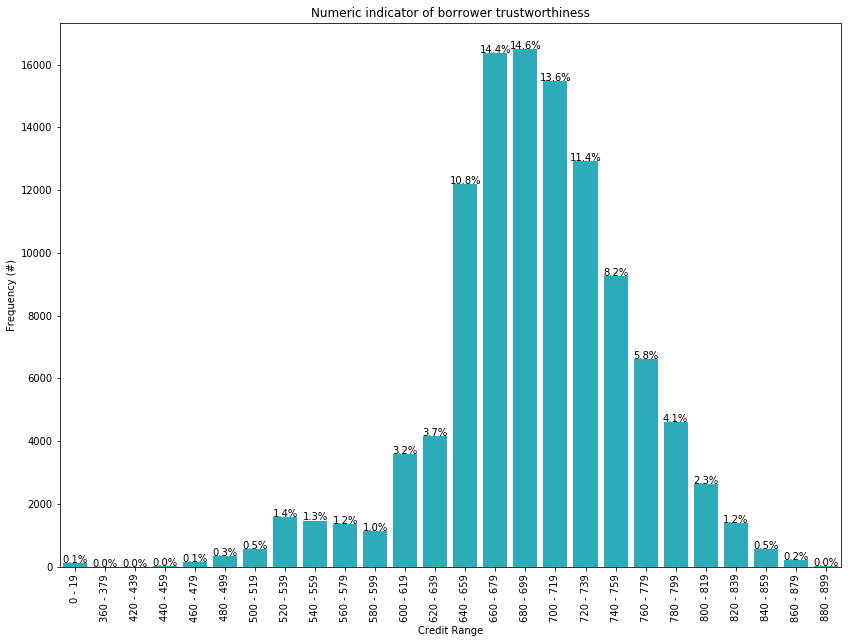

In [28]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_7 = sb.countplot(data = prosper, x = 'CreditRange', color = base_color,
                    order = credit_order)

for i in range(len(type_counts)):
    count = type_counts[i]
    #print(count)
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xticks(rotation = 90)
plt.xlabel('Credit Range')
plt.ylabel('Frequency (#)')

plt.title('Numeric indicator of borrower trustworthiness');

## Income Range

* How much money do our borrowers make? A large portion makes between \\$25,000 and \$75,000.
* A good portion makes at over \$75,000

In [29]:
ir_order = ['$0', 'Not displayed', 'Not employed', '$1-24,999', '$25,000-49,999',
            '$50,000-74,999', '$75,000-99,999', '$100,000+']

In [30]:
ir_classes = pd.api.types.CategoricalDtype(ordered = True, categories = ir_order)

prosper['IncomeRange'] = prosper['IncomeRange'].astype(ir_classes)

In [31]:
type_counts = prosper['IncomeRange'].value_counts()

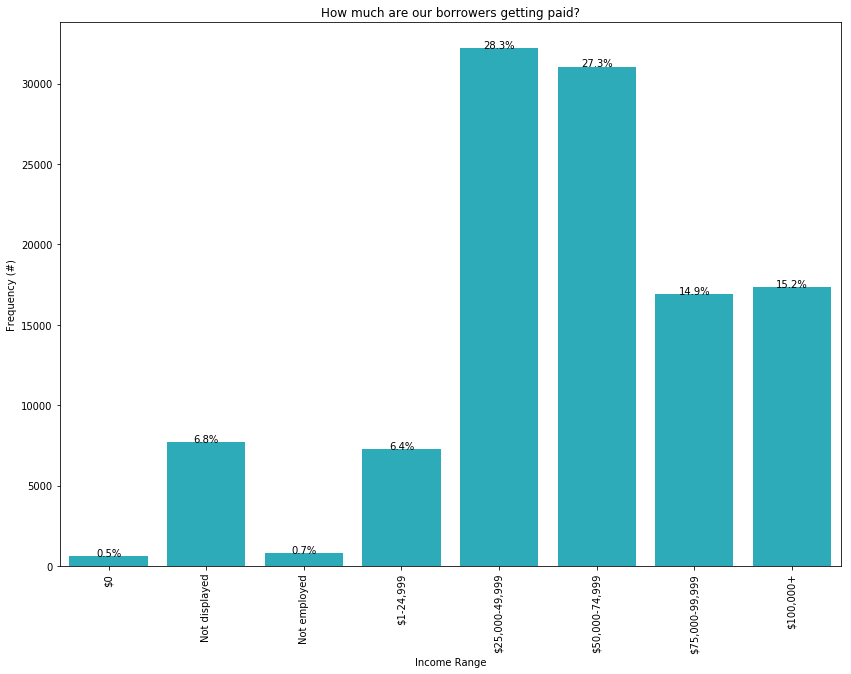

In [32]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_8 = sb.countplot(data = prosper, x = 'IncomeRange', color = base_color,
                    order = ir_order)

for i in range(len(type_counts)):
    count = type_counts[i]
    #print(count)
    display_val = '{:.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')

plt.xticks(rotation = 90)
plt.xlabel('Income Range')
plt.ylabel('Frequency (#)')
plt.title('How much are our borrowers getting paid?');

## Homeowner Status

* Slightly more homeowners than non-homeowners

In [33]:
type_counts = prosper['IsBorrowerHomeowner'].value_counts()
#type_order = type_counts.index

homeowner_ticks = [0, 1]
homeowner_labels = ['No', 'Yes']

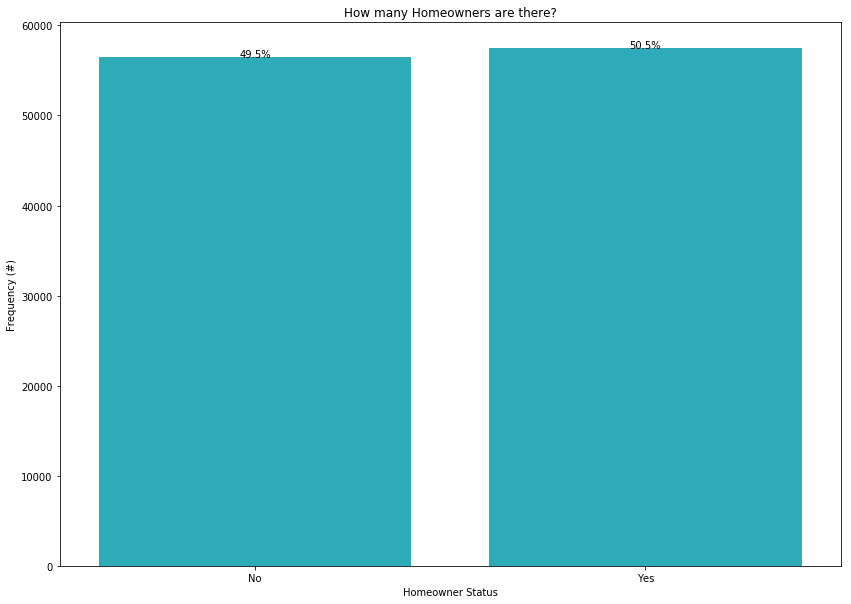

In [34]:
# We're doing a bar plot so that we can compare heights

fig = plt.figure(figsize = (fig_length, fig_height))

ax_9 = sb.countplot(data = prosper, x = 'IsBorrowerHomeowner', color = base_color);

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    display_val = '{:0.1f}%'.format(100 * count / sum(type_counts))
    plt.text(i, count + 1, display_val, va = 'baseline', ha = 'center')
    
plt.xticks(homeowner_ticks, homeowner_labels)

plt.xlabel('Homeowner Status')
plt.ylabel('Frequency (#)')
plt.title('How many Homeowners are there?');

## Now how are the variables related?

### Borrower APR vs Loan Status

* Noticeably higher Borrower APR as we get worse in loan status
* Defaulted and Chargedoff loans have a Borrower APR above average
* Completed and Current loans have a Borrower APR below average
* To get the highest Borrower APR, get the loan Past Due (> 120 days) or Chargedoff

In [35]:
# New figure sizes for the bivariate plots

fig_length = 14
fig_height = 10

In [36]:
ls_order = ['Cancelled', 'Completed', 'FinalPaymentInProgress', 'Current', 'Past Due (1-15 days)',
            'Past Due (16-30 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
            'Past Due (91-120 days)', 'Past Due (>120 days)', 'Defaulted', 'Chargedoff']

lclasses = pd.api.types.CategoricalDtype(ordered = True, categories = ls_order)
prosper['LoanStatus'] = prosper['LoanStatus'].astype(lclasses)

In [37]:
# Create Borrower APR y-axis labels

borrowerAPR_ticks = np.arange(0, 0.55, 0.05)
borrowerAPR_labels = ['{:.1f}'.format(v * 100) for v in borrowerAPR_ticks]

print(borrowerAPR_ticks)
print(borrowerAPR_labels)

[0.   0.05 0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5 ]
['0.0', '5.0', '10.0', '15.0', '20.0', '25.0', '30.0', '35.0', '40.0', '45.0', '50.0']


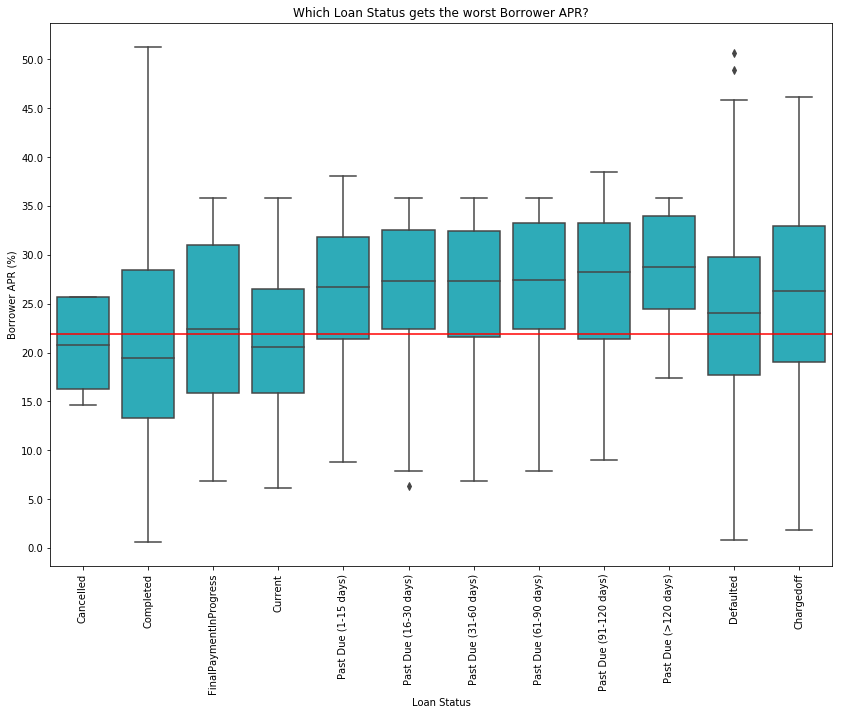

In [38]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_10 = sb.boxplot(data = prosper, x = 'LoanStatus', y = 'BorrowerAPR',
           color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)

plt.xlabel('Loan Status')
plt.ylabel('Borrower APR (%)')

plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)
plt.title('Which Loan Status gets the worst Borrower APR?');

## Prosper Score vs Loan Status

* Average Prosper Score of 6.
* For the highest Borrower APR, get a Prosper Score of 5 or below (Defaulted and Chargedoff)

In [39]:
prosper_subset = prosper[prosper['ProsperScore'].isnull() == False]

In [40]:
ps_mean = prosper['ProsperScore'].mean()

In [41]:
ps_ticks = np.arange(1, 12, 1)
ps_labels = ['{}'.format(v) for v in ps_ticks]

print(ps_ticks)
print(ps_labels)

[ 1  2  3  4  5  6  7  8  9 10 11]
['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11']


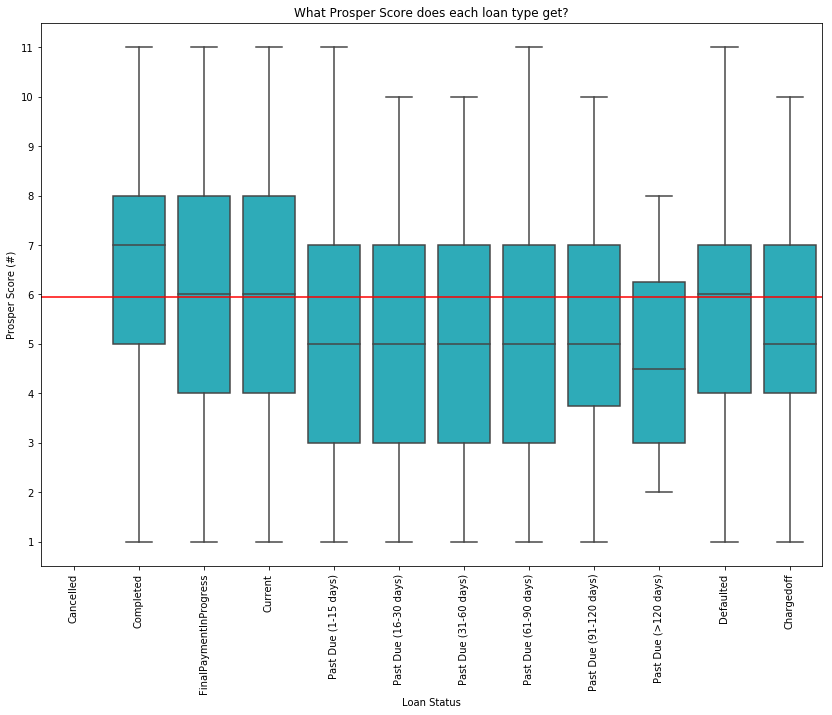

In [42]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_11 = sb.boxplot(data = prosper, x = 'LoanStatus', y = 'ProsperScore',
           color = base_color)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90)
plt.xlabel('Loan Status')

plt.yticks(ps_ticks, ps_labels)
plt.ylabel('Prosper Score (#)')
plt.title('What Prosper Score does each loan type get?');

## Borrower APR vs Prosper Score

* Is there a correlation between Borrower APR and Prosper Score? Somewhat negative.
* Almost every Prosper Score has Borrower APRs from 15 % to 35 %
* Some correlation at low Prosper Scores (1 - 2) with high Borrower APRs and high Prosper Scores (9 - 11) with low Borrower APRs
* To get the highest Borrower APR, get a Prosper Score of 1 or 2

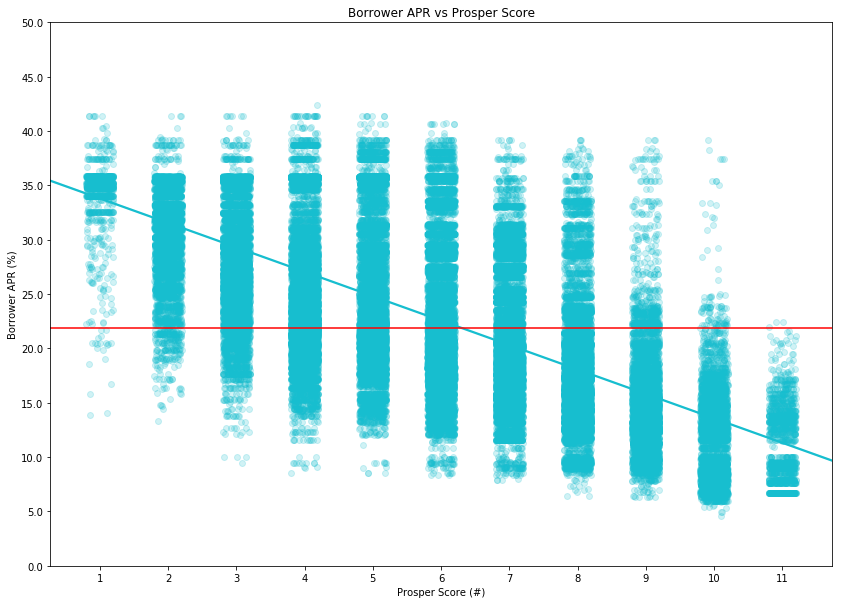

In [43]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_12 = sb.regplot(data = prosper, x = 'ProsperScore', y = 'BorrowerAPR', color = base_color, 
                   x_jitter = 0.2, scatter_kws = {'alpha': 0.2})

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xlabel('Prosper Score (#)')
plt.ylabel('Borrower APR (%)')
plt.xticks(ps_ticks, ps_labels)
plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)
plt.title('Borrower APR vs Prosper Score');

## Borrower APR vs Credit Rating

* Do borrowers with a better Credit Rating receive better Borrower APRs? Yes, and above a C rating, is where we see average Borrower APRs drop below the overall average.
* For the highest Borrower APR, get a Credit Rating of HR or E.

In [44]:
y_ticks = np.arange(0, 0.5 + 0.05, 0.05)
y_labels = ['{:.2f}'.format(v) for v in y_ticks]

In [45]:
gclasses = pd.api.types.CategoricalDtype(ordered = True, categories = cg_order)
prosper['CreditGrade'] = prosper['CreditGrade'].astype(gclasses)
prosper['ProsperRating (Alpha)'] = prosper['ProsperRating (Alpha)'].astype(gclasses)
prosper['CreditRating'] = prosper['CreditRating'].astype(gclasses)

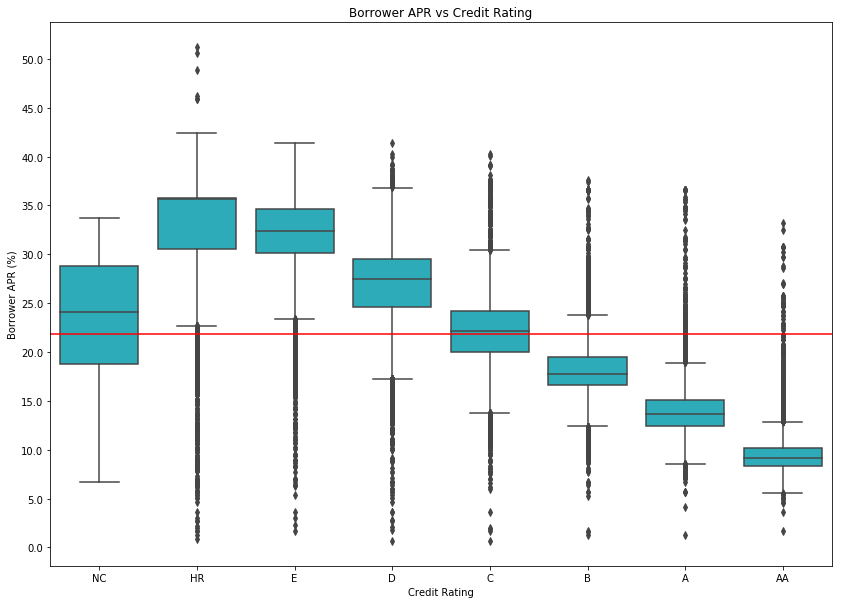

In [46]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_13 = sb.boxplot(data = prosper, x = 'CreditRating', y = 'BorrowerAPR',
           color = base_color)
plt.yticks(y_ticks, y_labels)
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xlabel('Credit Rating')
plt.ylabel('Borrower APR (%)')

plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)

plt.title('Borrower APR vs Credit Rating');

## Prosper Score vs Credit Rating

* Checking if this trend lines up with Prosper Score: Credit Ratings of a C or better are associated with better Prosper Scores.
* For the highest Borrower APR (HR and E), get a Prosper Score of 3 or 4.

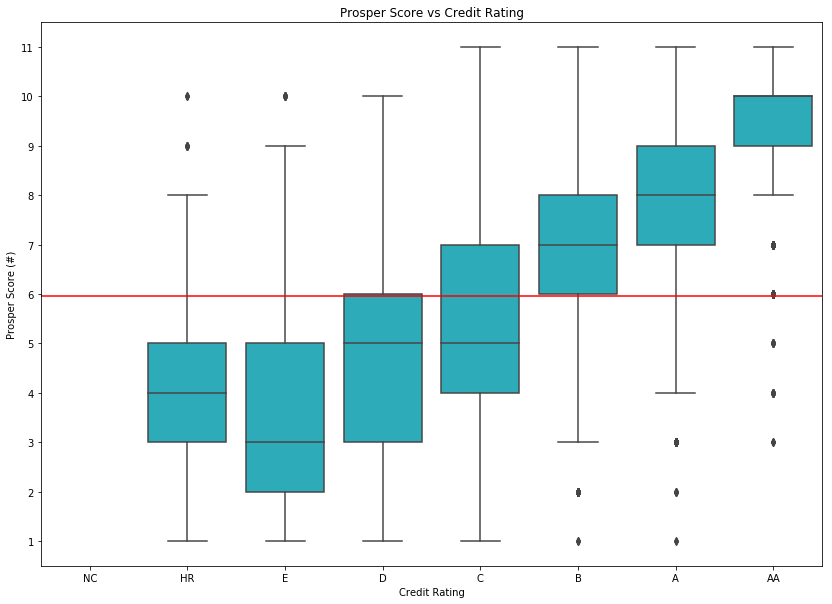

In [47]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_14 = sb.boxplot(data = prosper, x = 'CreditRating', y = 'ProsperScore',
           color = base_color)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5);

plt.xlabel('Credit Rating')
plt.ylabel('Prosper Score (#)')
plt.yticks(ps_ticks, ps_labels)

plt.title('Prosper Score vs Credit Rating');

## Borrower APR vs Listing Category

* Which loans get the highest and lowest Borrower APR?
* Highest: Cosmetic Procedure (10)
* Lowest: Not Available (0) and Personal Loan (4)
* Boat (9), Cosmetic Procedure (10), Green Loans (12) and RV (17) have largest lines, suggesting low amount of data
* Not Available (0) might suggest illicit activities

In [48]:
# Update Borrower APR ticks for the next plot
# y-axis starts from 0 to avoid plot distortions

borrowerAPR_ticks = np.arange(0, 0.35, 0.05)
borrowerAPR_labels = ['{:.1f}'.format(v * 100) for v in borrowerAPR_ticks]

print(borrowerAPR_ticks)
print(borrowerAPR_labels)

[0.   0.05 0.1  0.15 0.2  0.25 0.3 ]
['0.0', '5.0', '10.0', '15.0', '20.0', '25.0', '30.0']


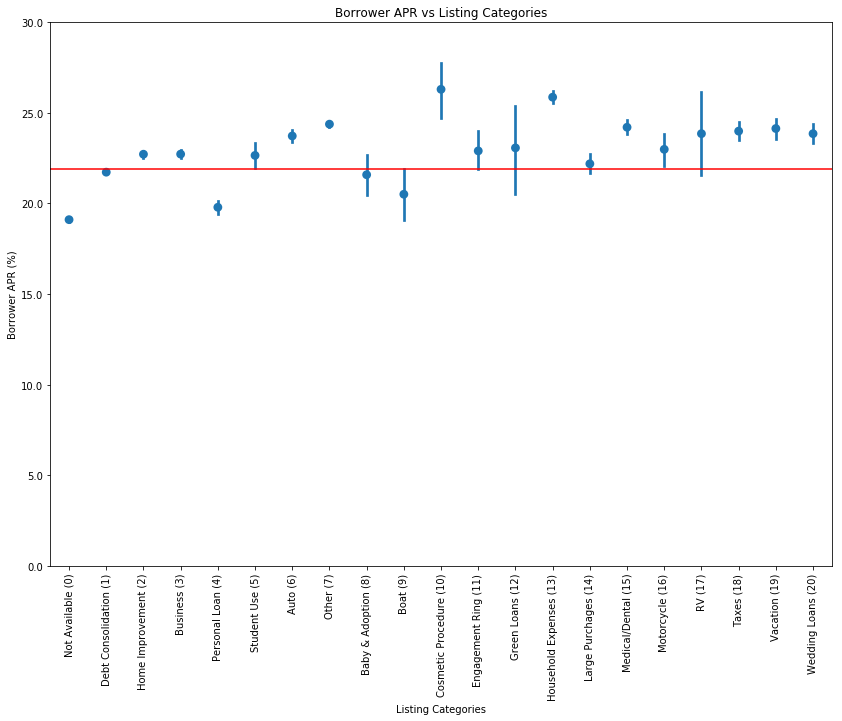

In [49]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_15 = sb.pointplot(data = prosper, x = 'ListingCategory (numeric)', 
                     y = 'BorrowerAPR', linestyles = '', order = lc_order)

ax_15.set_xticklabels(lc_ticks)
plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.xlabel('Listing Categories')
plt.ylabel('Borrower APR (%)')

plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)
plt.title('Borrower APR vs Listing Categories');

## Prosper Score vs Listing Category

* Most loans have near average Prosper Scores
* Highest Prosper Score: Student Use (5)
* Lowest Prosper Score: Not Available (0)

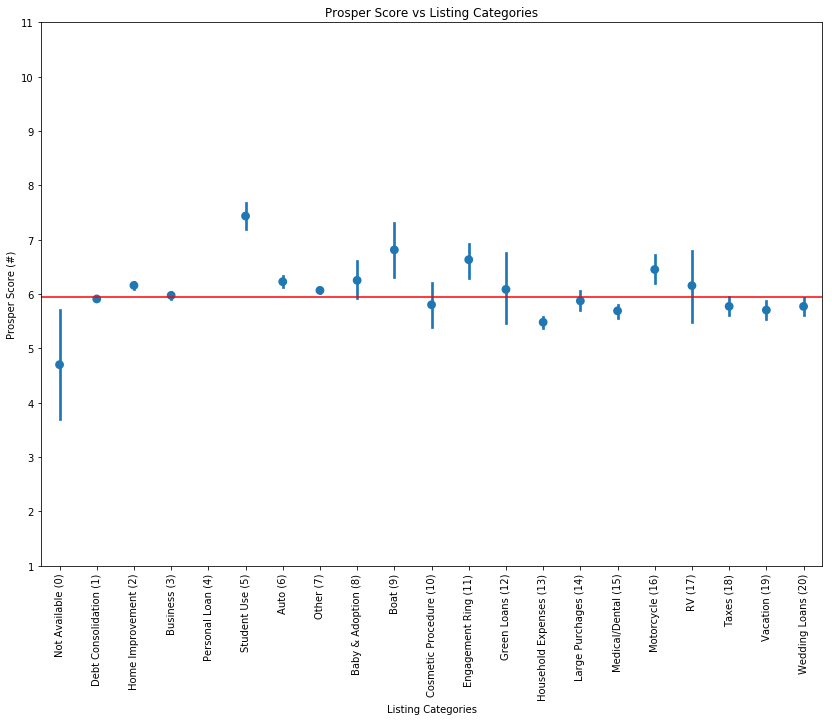

In [50]:
# Note: Prosper Score minimum is 1, so that's where we start on the y-axis

fig = plt.figure(figsize = (fig_length, fig_height))

ax_16 = sb.pointplot(data = prosper, x = 'ListingCategory (numeric)', 
                     y = 'ProsperScore', linestyles = '', order = lc_order)

ax_16.set_xticklabels(lc_ticks)
plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)

plt.xlabel('Listing Categories')
plt.ylabel('Prosper Score (#)')
plt.yticks(ps_ticks, ps_labels)

plt.title('Prosper Score vs Listing Categories');

## Borrower APR vs Employment Status

* Is there anything we might not expect?
* The "Not available" loans look surprising, with lower than average Borrower APR. Not sure how these borrowers secured a lower rate.
* To get the highest Borrower APR, put "Not employed" or "Other" on the loan application

In [51]:
borrowerAPR_ticks = np.arange(0, 0.5, 0.05)
borrowerAPR_labels = ['{:.1f}'.format(v * 100) for v in borrowerAPR_ticks]

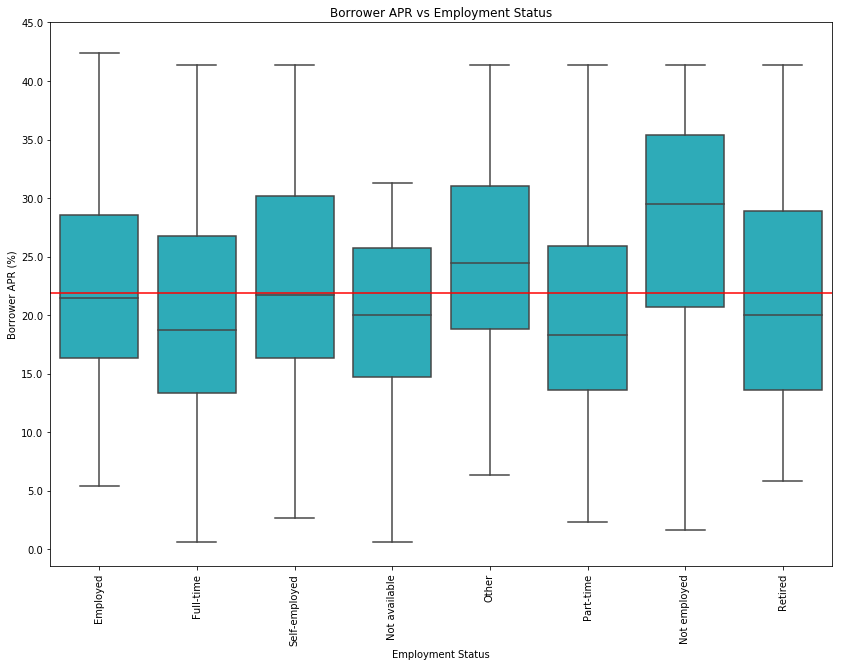

In [52]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_17 = sb.boxplot(data = prosper, x = 'EmploymentStatus', y = 'BorrowerAPR',
                   color = base_color, order = es_order)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)

plt.xlabel('Employment Status')
plt.ylabel('Borrower APR (%)')

plt.title('Borrower APR vs Employment Status');

## Prosper Score vs Employment Status

* Do Prosper Scores jive with the Borrower APR plot?
* Self-employed borrowers have lowest average Prosper Score, but average Borrower APR
* Most categories show either low Prosper Score and high Borrower APR, or vice versa.
* For lowest Prosper Score (Highest Borrower APR), put "Other" or "Not employed" on the loan application.

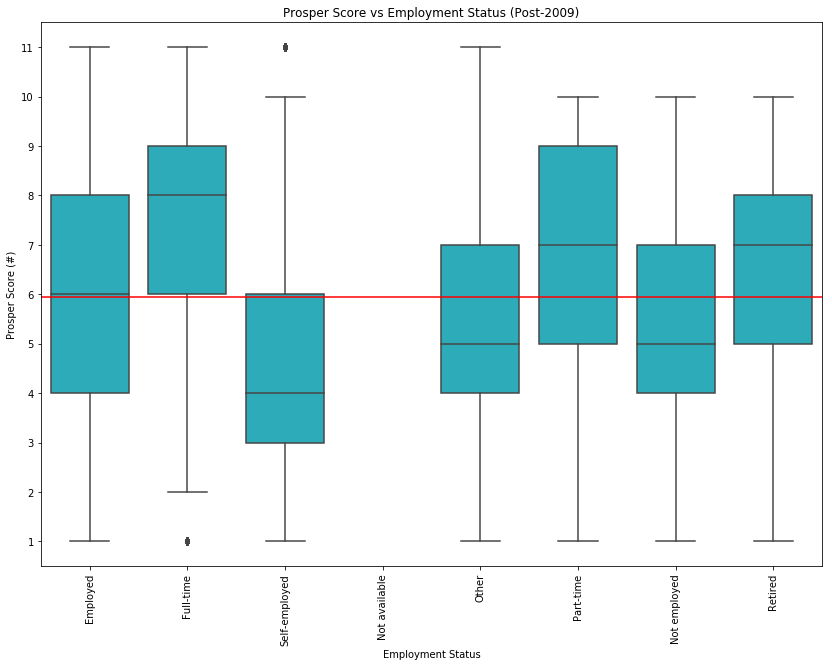

In [53]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_18 = sb.boxplot(data = prosper, x = 'EmploymentStatus', y = 'ProsperScore',
           color = base_color, order = es_order)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.yticks(ps_ticks, ps_labels)

plt.xlabel('Employment Status')
plt.ylabel('Prosper Score (#)')

plt.title('Prosper Score vs Employment Status (Post-2009)');

## Borrower APR vs Credit Range

* Increasing Credit Score above the 680 - 699 range lets us drop the Borrower APR below average
* Lots of outliers with good credit (Above 740) and high Borrower APR
* Lots of outliers with bad credit (Below 600) and low Borrower APR
* For highest borrower APRs, get a Credit Score below 660

In [54]:
# Check the amount of data in the outlier ranges

low_cr = ['500.0 - 519.0', '520.0 - 539.0', '540.0 - 559.0', '560.0 - 579.0', '580.0 - 599.0']
high_cr = ['740.0 - 759.0', '760.0 - 779.0', '780.0 - 799.0', '800.0 - 819.0', '820.0 - 839.0',
           '840.0 - 859.0', '860.0 - 879.0']

prosper[(prosper['CreditRange'].isin(low_cr)) & (prosper['BorrowerAPR'] < 0.15)].shape

(0, 83)

In [55]:
prosper[(prosper['CreditRange'].isin(high_cr)) & (prosper['BorrowerAPR'] > 0.25)].shape

(0, 83)

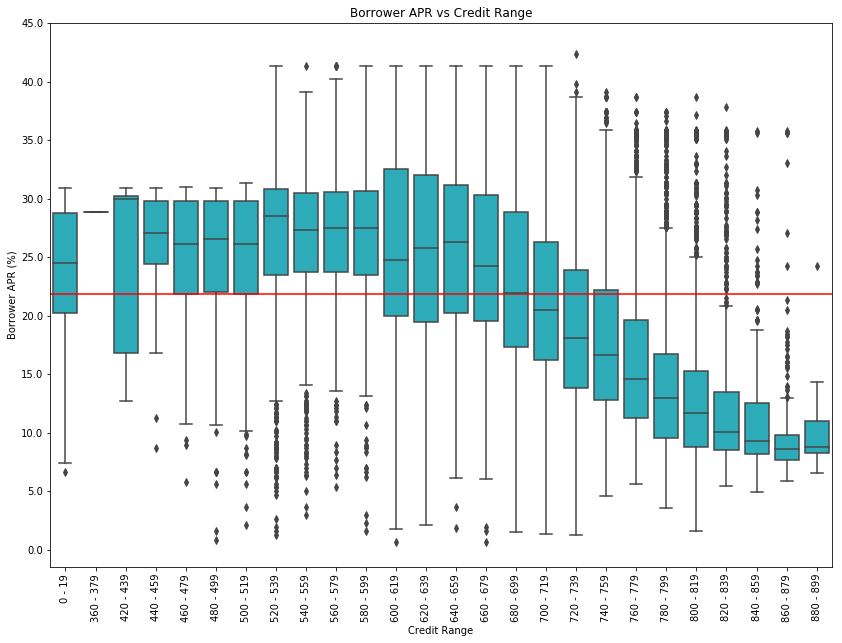

In [56]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_19 = sb.boxplot(data = prosper, x = 'CreditRange', y = 'BorrowerAPR',
                   color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90)
plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)

plt.xlabel('Credit Range')
plt.ylabel('Borrower APR (%)')

plt.title('Borrower APR vs Credit Range');

## Prosper Score vs Credit Range

* Generally positive correlation with Credit Range, but less pronounced because of discrete values
* No Prosper Scores below 600, coinciding with scoring in 2009.
* Note: Minimum suggested Credit Score = 640 (Prosper Guidelines)
* For lowest Prosper Score (Highest Borrower APR), get a Credit Score below 640.

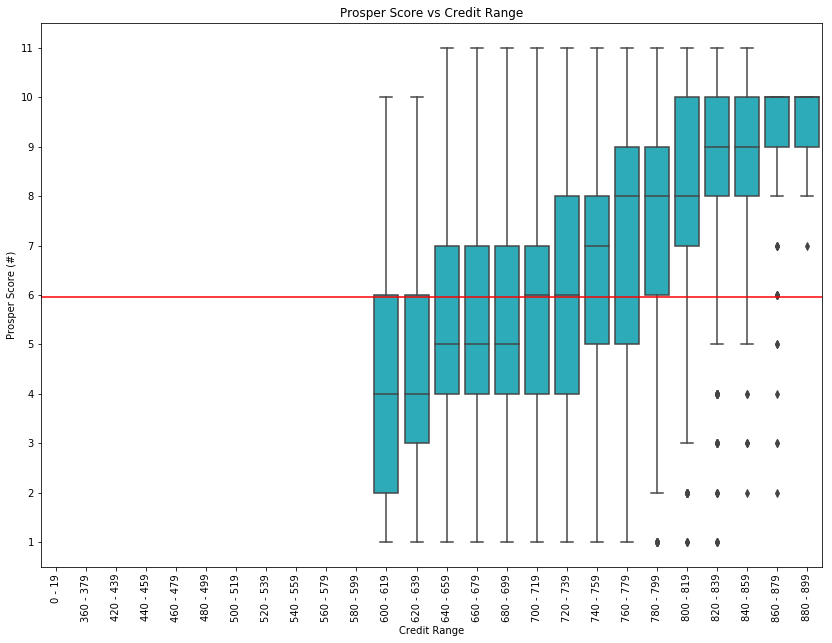

In [57]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_20 = sb.boxplot(data = prosper, x = 'CreditRange', y = 'ProsperScore',
           color = base_color)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)
plt.xticks(rotation = 90)
plt.yticks(ps_ticks, ps_labels)

plt.xlabel('Credit Range')
plt.ylabel('Prosper Score (#)')

plt.title('Prosper Score vs Credit Range');

## Borrower APR vs Income Range

* Borrower APR decreases as we increase Income Range
* Borrowers who report \$0 and Not displayed receive lowest Borrower APR
* For highest Borrower APR, put "Not Employed" or "\$1-24,999" on the loan application

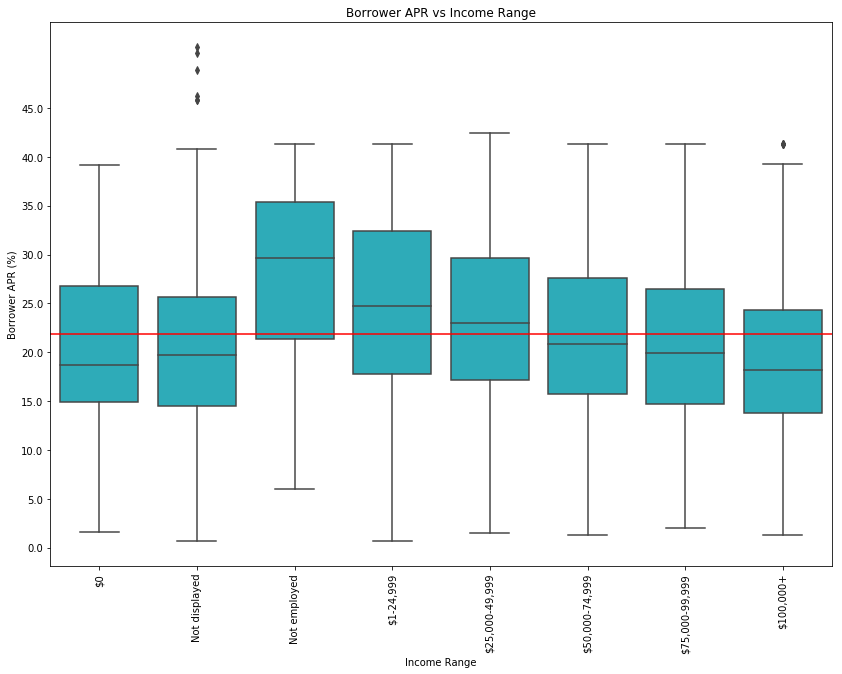

In [58]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_21 = sb.boxplot(data = prosper, x = 'IncomeRange', y = 'BorrowerAPR',
                   color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90)
plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)

plt.xlabel('Income Range')
plt.ylabel('Borrower APR (%)')

plt.title('Borrower APR vs Income Range');

## Borrower APR vs Income Range (Continued)

* The \\$0 category might be people in sales, or anyone who is paid with commission

In [59]:
new_categories = ['Other', 'Professional', 'Professional', 'Management & Support', 'Academia',
                  'Management & Support', 'Professional', 'Sales', 'Professional',
                  'Management & Support', 'Sales', 'Tradesman', 'Sales', 'Medical',
                  'Tradesman', 'Operator', 'Tradesman', 'Armed Forces', 'Civil Services',
                  'Professional', 'Armed Forces', 'Food Services', 'Professional',
                  'Food Services', 'Medical', 'Professional', 'Tradesman', 'Professional',
                  'Civil Services', 'Academia', 'Professional', 'Medical', 'Medical',
                  'Medical', 'Tradesman', 'Food Services', 'Civil Services', 'Academia',
                  'Armed Forces', 'Operator', 'Academia', 'Academia', 'Medical', 'Student',
                  'Tradesman', 'Professional', 'Professional', 'Professional', 'Professional',
                  'Religious', 'Student', 'Sales', 'Medical', 'Academia', 'Academia',
                  'Religious', 'Operator', 'Tradesman', 'Management & Support', 'Student',
                  'Tradesman', 'Student', 'Medical', 'Student', 'Student', 'Professional',
                  'Student']

PROFESSIONS_DICT = dict(zip(prosper['Occupation'].value_counts().index, new_categories))

In [60]:
def NewCategory(old_cat):
    if old_cat in PROFESSIONS_DICT.keys():
        return PROFESSIONS_DICT[old_cat]
    else:
        return 'Other'

prosper['NewCategory'] = prosper['Occupation'].apply(NewCategory)

occupation_order = prosper['NewCategory'].value_counts().index

In [61]:
prosper[prosper['IncomeRange'] == '$0']['NewCategory'].value_counts()

Other                   281
Professional             90
Sales                    81
Tradesman                49
Management & Support     37
Student                  30
Food Services            22
Academia                 16
Medical                  11
Religious                 1
Civil Services            1
Operator                  1
Armed Forces              1
Name: NewCategory, dtype: int64

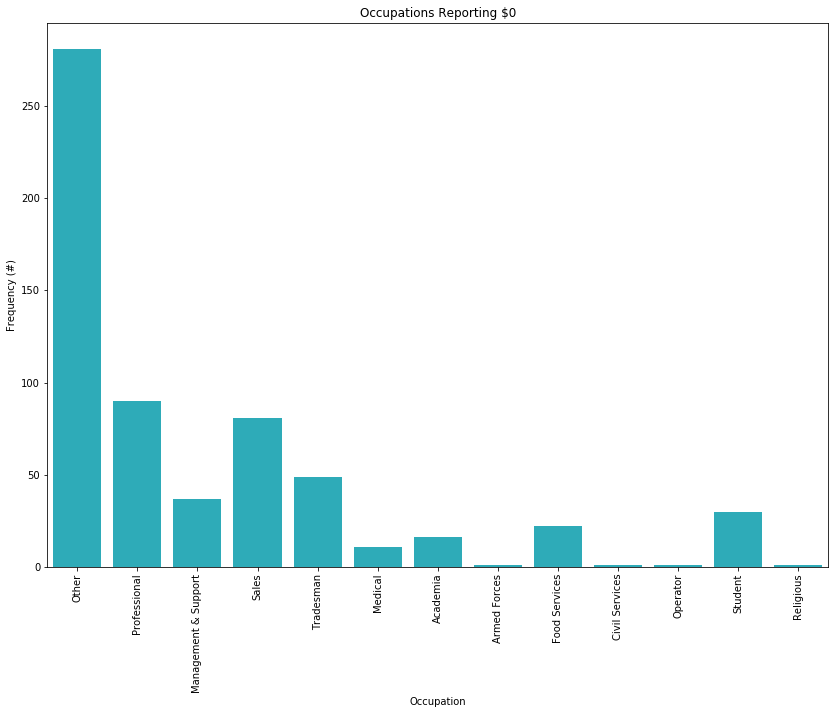

In [62]:
prosper_subset = prosper[prosper['IncomeRange'] == '$0']

fig = plt.figure(figsize = (fig_length, fig_height))

ax_22 = sb.countplot(data = prosper_subset, x = 'NewCategory', color = base_color,
                     order = occupation_order)

plt.xticks(rotation = 90)
plt.xlabel('Occupation')
plt.ylabel('Frequency (#)')

plt.title('Occupations Reporting $0');

## Prosper Score vs Income Range

* Similar trend as the Credit Range plots (Higher Prosper Score for higher Income Range)
* For lowest Prosper Scores, put "\\$0", "Not Employed", "\\$1-24,999", or "\$25,000-49,999" on the loan application.
* Note: "\\$0" and "\$25,000-49,000" were associated with low Borrower APRs. To maximize Borrower APR, best to put "Not Employed" or "\\$1-24,999" on the loan application.

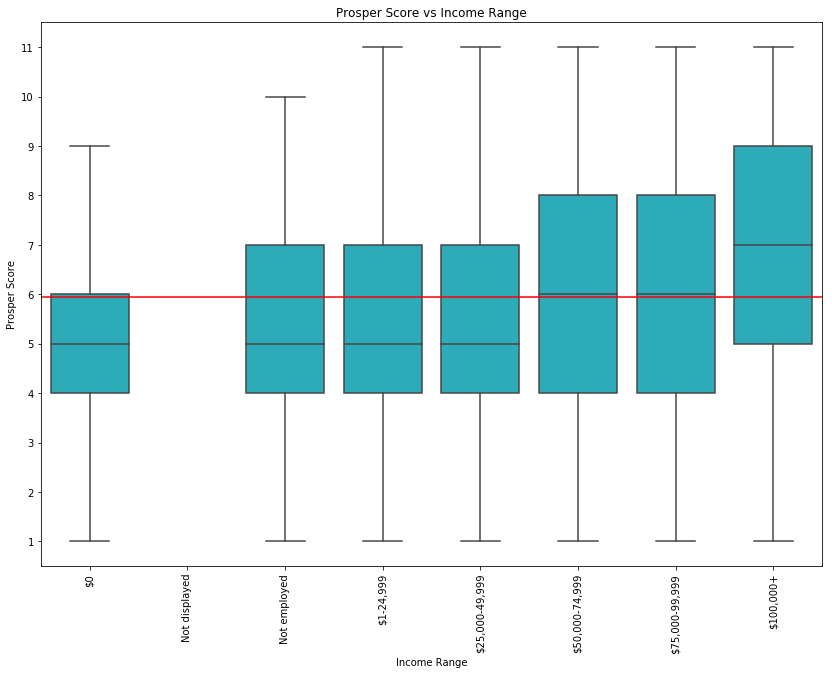

In [63]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_21 = sb.boxplot(data = prosper, x = 'IncomeRange', y = 'ProsperScore',
                   color = base_color)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)

plt.xticks(rotation = 90)
plt.yticks(ps_ticks, ps_labels)

plt.xlabel('Income Range')
plt.ylabel('Prosper Score')

plt.title('Prosper Score vs Income Range');

## Borrower APR vs Homeowner Status

* Does being a homeowner help with Borrower APR?
* Slightly lower average Borrower APR for Homeowners. Seems to make a difference
* For highest Borrower APR, put "No" on the loan application.

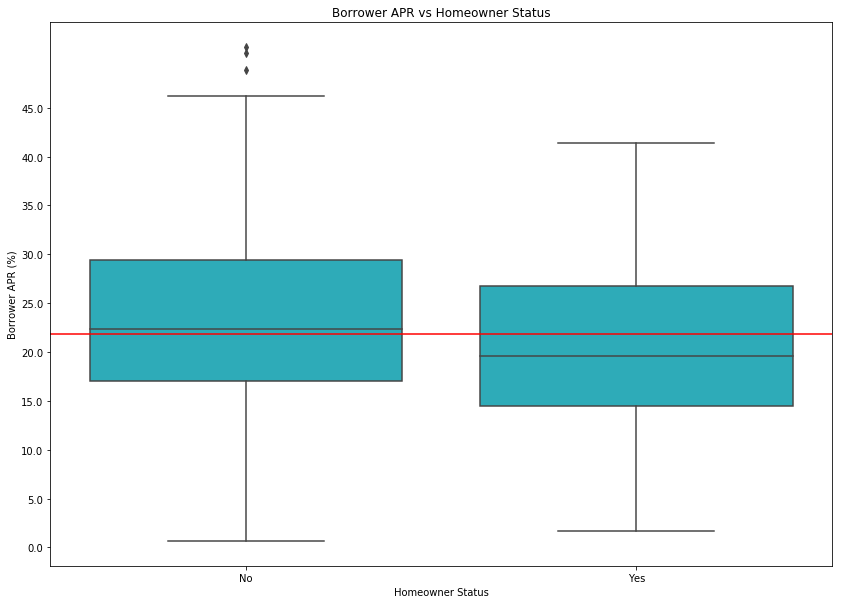

In [64]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_24 = sb.boxplot(data = prosper, x = 'IsBorrowerHomeowner', y = 'BorrowerAPR',
                   color = base_color)

plt.axhline(y = mean_APR, color = 'r', linewidth = 1.5)
plt.xticks(homeowner_ticks, homeowner_labels)
plt.yticks(borrowerAPR_ticks, borrowerAPR_labels)

plt.xlabel('Homeowner Status')
plt.ylabel('Borrower APR (%)')

plt.title('Borrower APR vs Homeowner Status');

## Prosper Score vs Homeowner Status

* Seems to make no difference in Prosper Score

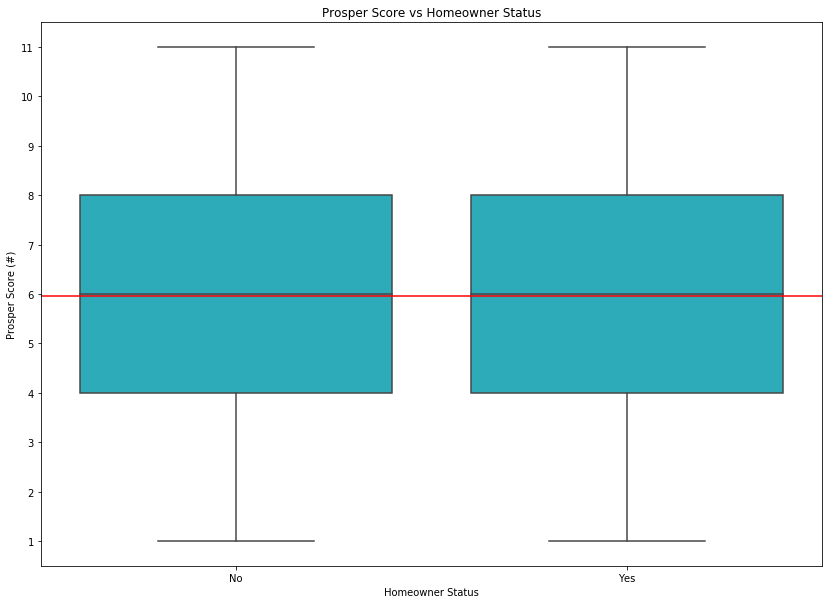

In [65]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_25 = sb.boxplot(data = prosper, x = 'IsBorrowerHomeowner', y = 'ProsperScore',
           color = base_color)

plt.axhline(y = ps_mean, color = 'r', linewidth = 1.5)

plt.xticks(homeowner_ticks, homeowner_labels)
plt.yticks(ps_ticks, ps_labels)

plt.xlabel('Homeowner Status')
plt.ylabel('Prosper Score (#)')

plt.title('Prosper Score vs Homeowner Status');

## Other Cool Heat Maps (Loan Counts) We Made

* Credit Rating vs Listing Category
* Credit Rating vs Employment Status
* Credit Rating vs Credit Score Range
* Credit Rating vs Income Range

## Credit Rating vs Listing Category (Loan Counts)

* Most loans are in Debt Consolidation (1)
* Most loans are within a Credit Rating of A through D

In [66]:
crlc_counts = prosper.groupby(['CreditRating', 'ListingCategory (numeric)']).size()
crlc_counts = crlc_counts.reset_index(name = 'count')
crlc_counts = crlc_counts.pivot(index = 'CreditRating', columns = 'ListingCategory (numeric)', values = 'count')

crlc_counts = crlc_counts.sort_index(ascending = False)

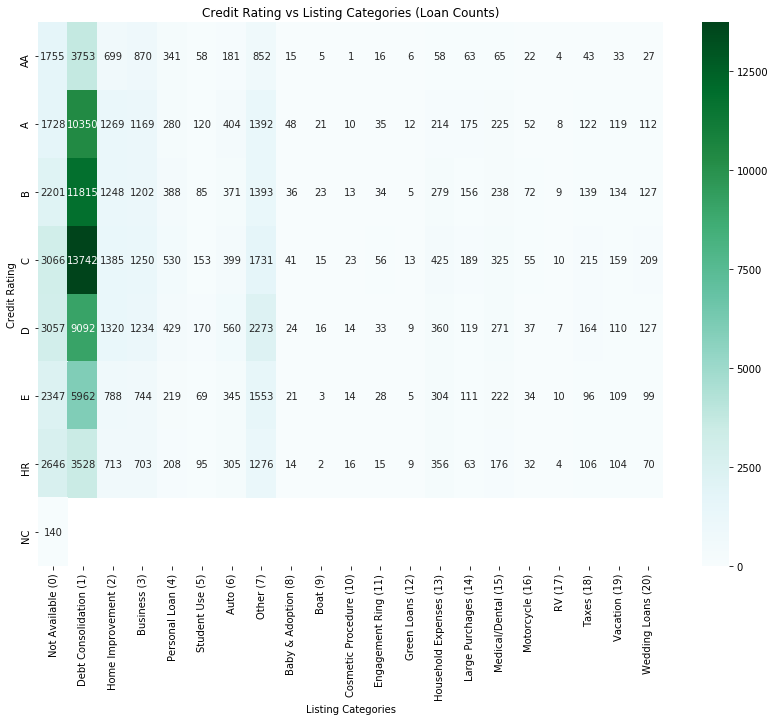

In [67]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_26 = sb.heatmap(crlc_counts, annot = True, fmt = '.0f', cmap = 'BuGn')

ax_26.set_xticklabels(lc_ticks)
plt.xticks(rotation = 90)

plt.xlabel('Listing Categories')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Listing Categories (Loan Counts)');

## Credit Rating vs Employment Status (Loan Counts)

* Most borrowers are either Employed or Full-time
* Most loans are within a Credit Rating of A through D (Same finding as previous plot)

In [68]:
cres_counts = prosper.groupby(['CreditRating', 'EmploymentStatus']).size()
cres_counts = cres_counts.reset_index(name = 'count')
cres_counts = cres_counts.pivot(index = 'CreditRating', columns = 'EmploymentStatus', values = 'count')

cres_counts = cres_counts.sort_index(ascending = False)

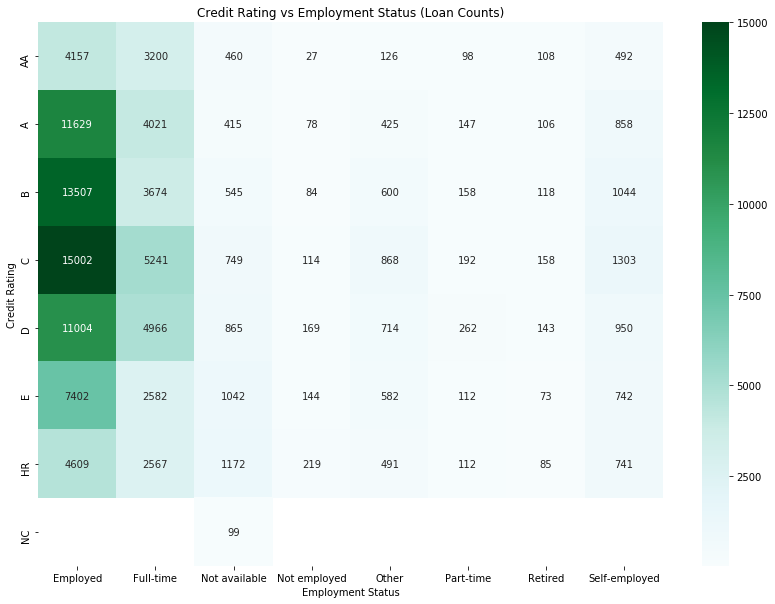

In [69]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_27 = sb.heatmap(cres_counts, annot = True, fmt = '.0f', cmap = 'BuGn')

plt.ylabel('Credit Rating')
plt.xlabel('Employment Status')
plt.title('Credit Rating vs Employment Status (Loan Counts)');

## Credit Rating vs Credit Score Range (Loan Counts)

* As expected, Credit Rating improves as Credit Score Range improves

In [70]:
crcr_counts = prosper.groupby(['CreditRating', 'CreditRange']).size()
crcr_counts = crcr_counts.reset_index(name = 'count')

crcr_counts = crcr_counts.pivot(index = 'CreditRating', columns = 'CreditRange', values = 'count')
crcr_counts = crcr_counts.sort_index(ascending = False)

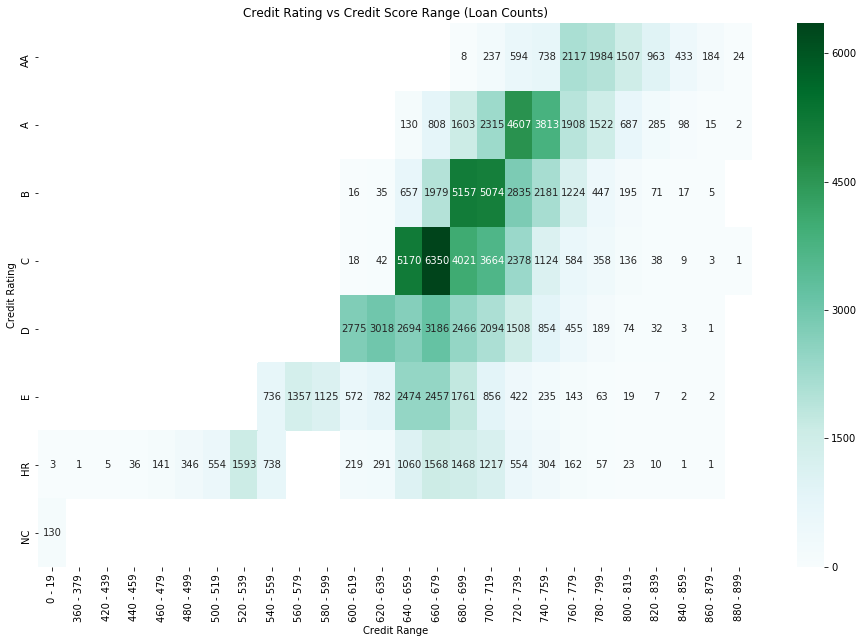

In [71]:
# This plot is slightly bigger because some of the numbers got crunched together

fig = plt.figure(figsize = (fig_length + 2, fig_height))

ax_28 = sb.heatmap(crcr_counts, annot = True, fmt = '.0f', cmap = 'BuGn')

plt.xticks(rotation = 90)
plt.xlabel('Credit Range')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Credit Score Range (Loan Counts)');

## Credit Rating vs Income Range (Loan Counts)

* Most borrowers have an income of at least \\$25,000
* Most loans are within Credit Rating of A through E

In [72]:
crir_counts = prosper.groupby(['CreditRating', 'IncomeRange']).size()
crir_counts = crir_counts.reset_index(name = 'count')
crir_counts = crir_counts.pivot(index = 'CreditRating', columns = 'IncomeRange', values = 'count')

crir_counts = crir_counts.sort_index(ascending = False)

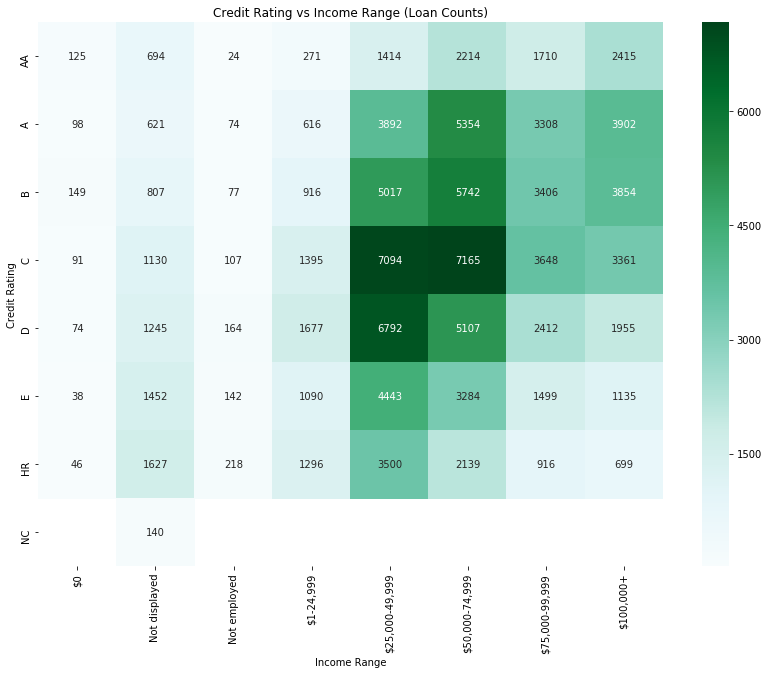

In [73]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_29 = sb.heatmap(crir_counts, annot = True, fmt = '.0f', cmap = 'BuGn')

plt.xticks(rotation = 90)

plt.xlabel('Income Range')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Income Range (Loan Counts)');

## Some More Cool Heat Maps (Average Borrower APRs) We Made:

* Credit Rating vs Listing Categories
* Credit Rating vs Employment Status
* Credit Rating vs Credit Score Range
* Credit Rating vs Income Range

Note: Plots are zoomed based on areas of the count plots that showed the most data.

## Credit Rating vs Listing Categories (Average Borrower APR)

* Focus: Categories 0 through 10
* Highest average Borrower APR for Credit Ratings E and HR
* Consistently higher average Borrower APR as Credit Rating decreases, for each Listing Category
* For highest Borrower APR, put Boat (9) or Cosmetic Procedure (10) on loan application

In [74]:
crir_borrowerAPR = prosper.groupby(['CreditRating', 'ListingCategory (numeric)'])['BorrowerAPR'].mean()
crir_borrowerAPR = crir_borrowerAPR.reset_index(name = 'averages')
crir_borrowerAPR = crir_borrowerAPR.pivot(index = 'CreditRating', columns = 'ListingCategory (numeric)', values = 'averages')

crir_borrowerAPR = crir_borrowerAPR * 100

crir_borrowerAPR = crir_borrowerAPR.sort_index(ascending = False)

In [75]:
# Range of Listing Categories we want to view

categories = np.arange(0, 11, 1)
categories

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

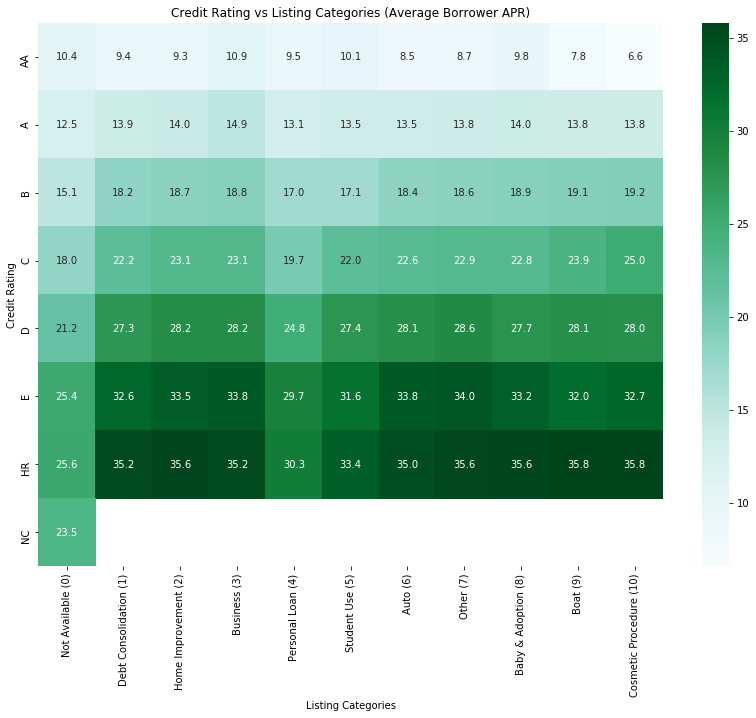

In [76]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_30 = sb.heatmap(crir_borrowerAPR[categories], annot = True, fmt = '.1f', cmap = 'BuGn')

ax_30.set_xticklabels(lc_ticks[0:11])

plt.xticks(rotation = 90)

plt.xlabel('Listing Categories')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Listing Categories (Average Borrower APR)');

## Credit Rating vs Employment Status (Average Borrower APR)

* Focus: Employed, Full-time, Not available, Self-employed
* Highest average Borrower APRs for Credit Ratings D, E, and HR
* Highest average Borrower APRs for Employed / HR and Self-employed / HR loans
* For highest borrower APR, we can put Employed and get a HR loan

In [77]:
cres_borrowerAPR = prosper.groupby(['CreditRating', 'EmploymentStatus'])['BorrowerAPR'].mean()
cres_borrowerAPR = cres_borrowerAPR.reset_index(name = 'averages')
cres_borrowerAPR = cres_borrowerAPR.pivot(index = 'CreditRating', columns = 'EmploymentStatus', values = 'averages')

cres_borrowerAPR = cres_borrowerAPR * 100

cres_borrowerAPR = cres_borrowerAPR.sort_index(ascending = False)

In [78]:
# Look at a subset of the average Borrower APR data, based on the count heat plots above

cres_subset = cres_borrowerAPR[['Employed', 'Full-time', 'Not available', 'Self-employed']]

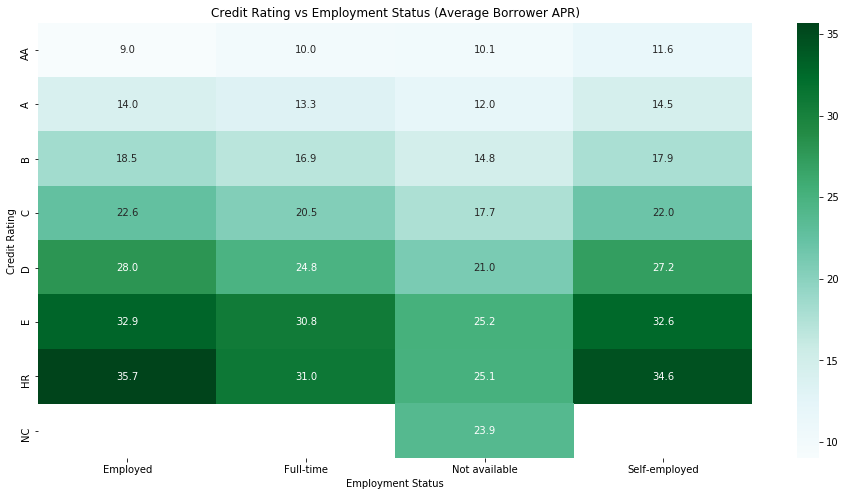

In [79]:
fig = plt.figure(figsize = (16, 8))

ax_31 = sb.heatmap(cres_subset, annot = True, fmt = '.1f', cmap = 'BuGn');

plt.xlabel('Employment Status')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Employment Status (Average Borrower APR)');

## Credit Rating vs Credit Score Range (Average Borrower APR)

* Focus: Credit Scores between 600 and 760, Credit Ratings between A and E
* Highest average Borrower APRs for Credit Ratings D and E for each Credit Score range
* Note: Highest average borrower APRs are amongst Credit Ratings D and E. However, the count heat plot above shows that the Credit Range / Credit Rating combo of 740 - 759 / E has fewer than 300 data points (When we look at data towards bottom right corner)
* For highest Borrower APR, get a Credit Score between 600 and 760, with a Credit Rating of E.

In [80]:
crcr_borrowerAPR = prosper.groupby(['CreditRating', 'CreditRange'])['BorrowerAPR'].mean()
crcr_borrowerAPR = crcr_borrowerAPR.reset_index(name = 'averages')
crcr_borrowerAPR = crcr_borrowerAPR.pivot(index = 'CreditRating', columns = 'CreditRange', values = 'averages')

crcr_borrowerAPR = crcr_borrowerAPR.sort_index(ascending = False)
crcr_borrowerAPR = crcr_borrowerAPR * 100

In [81]:
sub_crange = ['600 - 619', '620 - 639', '640 - 659', '660 - 679', '680 - 699', '700 - 719', '720 - 739', '740 - 759']
sub_crating = ['E', 'D', 'C', 'B', 'A']

crcr_subset = crcr_borrowerAPR[sub_crange].loc[sub_crating]
crcr_subset = crcr_subset.sort_index(ascending = False)

In [82]:
crcr_subset

CreditRange,600 - 619,620 - 639,640 - 659,660 - 679,680 - 699,700 - 719,720 - 739,740 - 759
CreditRating,,,,,,,,
A,NaN,NaN,14.241523,14.458604,14.199763,13.664172,13.783418,13.668687
B,18.551625,18.816314,18.996374,18.587226,17.571939,17.587966,18.276011,18.387144
C,24.542222,23.933500,20.652598,21.229983,22.334160,22.479085,22.689241,23.464923
D,23.397974,23.170322,27.924102,27.747293,27.820581,27.867301,28.603542,28.895785
E,33.677212,33.422403,32.574767,32.929100,33.193244,33.415095,33.331680,33.249315


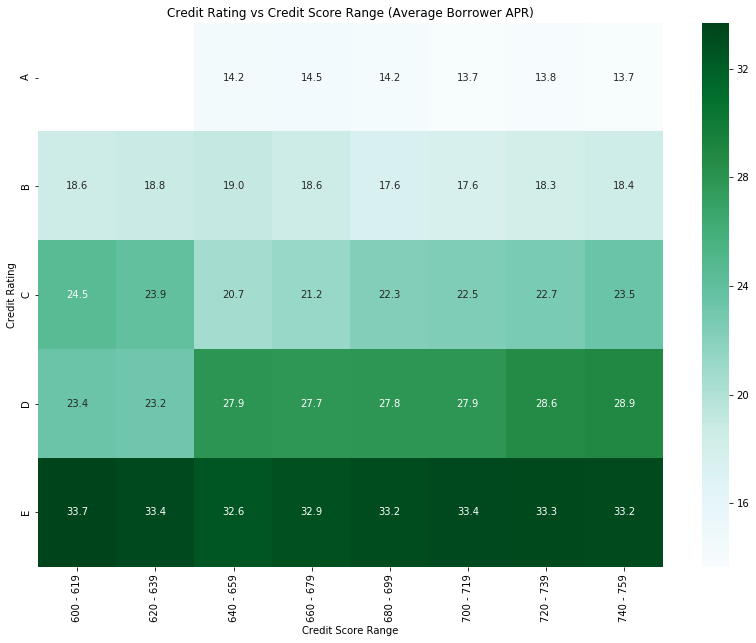

In [83]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_32 = sb.heatmap(crcr_subset, annot = True, fmt = '.1f', cmap = 'BuGn')

plt.xticks(rotation = 90)

plt.xlabel('Credit Score Range')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Credit Score Range (Average Borrower APR)');

## Credit Rating vs Income Range (Average Borrower APR)

* Focus: Income Ranges "Not displayed", "\\$1-24,999", "\\$25,000-49,999", "\\$50,000-74,999", "\\$75,000-99,999", "\\$100,000+"
* Average Borrower APR generally decreases as we improve Credit Rating, across Income Ranges
* For Credit Ranges A, B, C, D, E, and HR, average Borrower APR actually increase as we increase income range (Left to Right)

In [84]:
crir_borrowerAPR = prosper.groupby(['CreditRating', 'IncomeRange'])['BorrowerAPR'].mean()
crir_borrowerAPR = crir_borrowerAPR.reset_index(name = 'averages')
crir_borrowerAPR = crir_borrowerAPR.pivot(index = 'CreditRating', columns = 'IncomeRange', values = 'averages')

crir_borrowerAPR = crir_borrowerAPR * 100

In [85]:
sub_irange = ['Not displayed', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
sub_crating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

crir_subset = crir_borrowerAPR[sub_irange].loc[sub_crating]
crir_subset = crir_subset.sort_index(ascending = False)

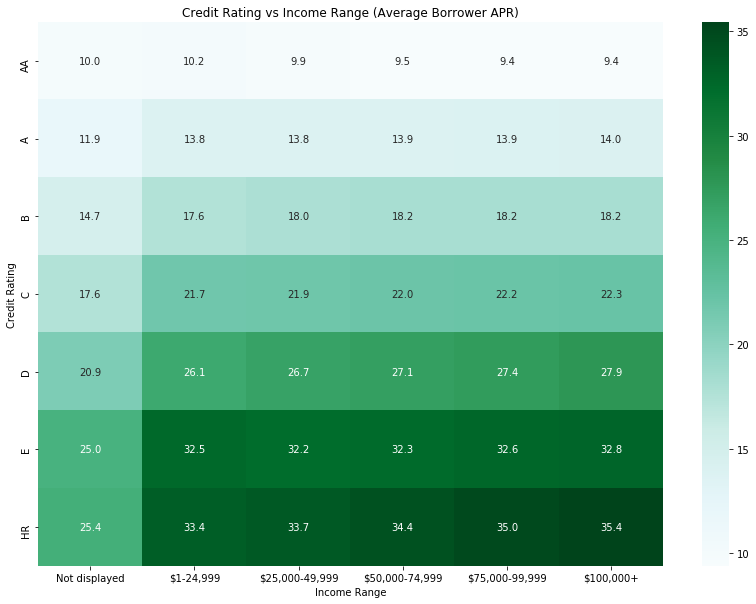

In [86]:
fig = plt.figure(figsize = (fig_length, fig_height))

ax_33 = sb.heatmap(crir_subset, annot = True, fmt = '.1f', cmap = 'BuGn')

plt.xlabel('Income Range')
plt.ylabel('Credit Rating')

plt.title('Credit Rating vs Income Range (Average Borrower APR)');

## Conclusion (How to get the highest Borrower APR)

* Have the loan Chargedoff
* Get a Prosper Score between 1 and 2 (Definitely 5 or below)
* Obtain a Credit Rating of HR or E
* Apply for a Cosmetic Procedure (10) loan
* Put Not employed or Employed (With a Credit Rating of HR) on the loan application, under Employment Status
* Get a Credit Score below 640
* Report an income of Not employed or \\$1-24,999 (It's not \\$0 or \\$1-24,999 that gets the highest Borrower APR)
* Say you're not a Homeowner